<a href="https://colab.research.google.com/github/zama-sarib/ML-Implementation/blob/master/Retail_Pulse_DS_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [ ]:
# Reading the the sheet from excel file. There are two sheets in the excel file.

df1 = pd.read_excel("RetailPulseAssignmentData.xlsx",sheet_name=0)
df2 = pd.read_excel("RetailPulseAssignmentData.xlsx",sheet_name=1)

In [ ]:
# Printing the top 5 rows of each sheet in the excel file

print(df1.head())
print(df2.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365

In [ ]:
# Concatening the two sheet into single pandas dataframe to handle and manipulate the data

data = pd.concat([df1,df2],axis=0,ignore_index=True)
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# Printing the number of records and columns in the excel files.

print("There are '{}' rows/records in the excel file".format(data.shape[0]))
print("There are '{}' columns in the excel file".format(data.shape[1]))

There are '1067371' rows/records in the excel file
There are '8' columns in the excel file


In [ ]:
# Checking the datatypes of each features in the dataframe.
# We can see there is dataTime data and hence it can used to understand the customer purchase behaviour over time.
# There are 4 features which are string datatype(object) and 2 data are of floating datatype

data.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [ ]:
data[data.duplicated(subset=['InvoiceDate','Customer ID','Invoice','StockCode','Quantity','Price','Country'])].sort_values('Customer ID')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
255589,C514024,M,Manual,-1,2010-06-30 11:22:00,12.94,12346.0,United Kingdom
540424,537626,85232D,SET/3 DECOUPAGE STACKING TINS,3,2010-12-07 14:57:00,4.95,12347.0,Iceland
540401,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland
540402,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland
540403,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
950260,573286,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-10-28 14:38:00,2.55,NaN,Switzerland
950272,573286,21210,SET OF 72 RETROSPOT PAPER DOILIES,1,2011-10-28 14:38:00,1.45,NaN,Switzerland
950407,573290,23396,LE JARDIN BOTANIQUE CUSHION COVER,1,2011-10-28 14:51:00,3.75,NaN,Switzerland
1008471,577489,23221,REINDEER HEART DECORATION SILVER,1,2011-11-20 12:07:00,0.83,NaN,United Kingdom


In [ ]:
print("The number of the duplicate data points are: {}".format(data[data.duplicated(subset=['InvoiceDate','Customer ID','Invoice','StockCode','Quantity','Price','Country'])].sort_values('Customer ID').shape[0]))

The number of the duplicate data points are: 34337


In [ ]:
# Printing the no of record/datapoints after dropping the duplicate row

data.drop_duplicates(subset=['InvoiceDate','Customer ID','Invoice','StockCode','Quantity','Price','Country'],keep='first',inplace=True)
data.shape

(1033034, 8)

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64


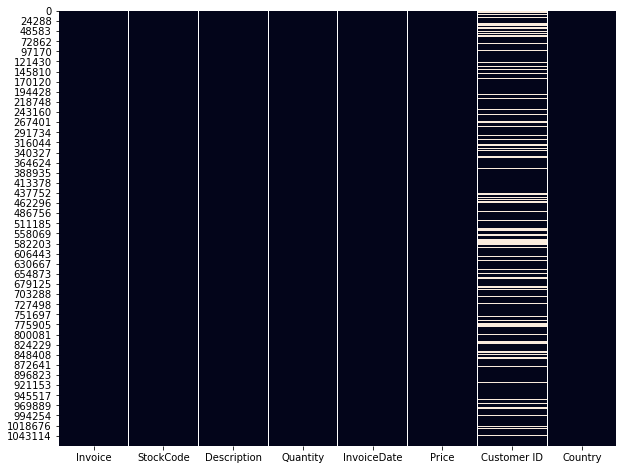

In [ ]:
# Printing and Plotting the null values in the dataset.
# we can see there are lot of null values in the customerId feature in our data.
# We can observe that few data points are NA in description feature. We need to handle this cases to further modelling if needed.


plt.figure(figsize=(10,8))
sns.heatmap(data.isnull(), cbar=False)

print(data.isnull().sum())

In [ ]:
# Statistical Description of the dataframe.
data.describe()


,Quantity,Price,Customer ID
count,1.033034e+06,1.033034e+06,797883.000000
mean,1.007661e+01,4.613982e+00,15313.068776
std,1.751976e+02,1.223976e+02,1696.464558
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13964.000000
50%,3.000000e+00,2.100000e+00,15228.000000
75%,1.000000e+01,4.150000e+00,16788.000000
max,8.099500e+04,3.897000e+04,18287.000000


# Exploratory Data Analysis

### Analyzing the feature "Invoice" feature in the dataset

In [ ]:
print("The number of unique Invoices are {}".format(len(data['Invoice'].unique())))

The number of unique Invoices are 53628


In [ ]:
print("The top 5 count of unique invoice_id are:")
print('-'*50)
print(data['Invoice'].value_counts().head())
print()
print("*"*50)
print()
print("The bottom 5 count of unique invoice_id are:")
print('-'*50)
print(data['Invoice'].value_counts().tail())


The top 5 count of unique invoice_id are:
--------------------------------------------------
573585    1114
581219     749
581492     731
580729     721
558475     705
Name: Invoice, dtype: int64

**************************************************

The bottom 5 count of unique invoice_id are:
--------------------------------------------------
571553    1
503707    1
571460    1
571459    1
507441    1
Name: Invoice, dtype: int64


<Figure size 432x288 with 0 Axes>

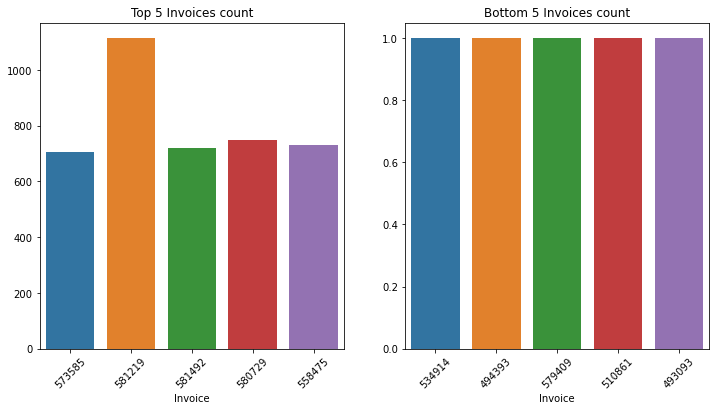

In [ ]:
plt.figure()
fig ,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
val1 = data.groupby(['Invoice'])['Price'].count().sort_values(ascending=False).head(5)
ax1 = sns.barplot(x=val1.index,y=val1.values,ax=ax1)
ax1.set_title("Top 5 Invoices count")
ax1.set_xticklabels(labels=val1.index, rotation=45)


val2 = data.groupby(['Invoice'])['Price'].count().sort_values(ascending=False).tail(5)
sns.barplot(x=val2.index,y=val2.values,ax=ax2)
ax2.set_title("Bottom 5 Invoices count")
ax2.set_xticklabels(labels=val2.index, rotation=45)
plt.show()

Observation : 
1. All Top Five Invoices have been occured more than 600 times.
2. All bottom Five Invoices have occurred only once.

In [ ]:
print(data.groupby(['Customer ID'])['Invoice'].count().sort_values(ascending=False))
customer_id_frequent_purchase = list(data.groupby(['Customer ID'])['Invoice'].count().sort_values(ascending=False).head(500).index)

Customer ID
17841.0    12638
14911.0    11444
12748.0     6662
14606.0     6500
14096.0     5128
           ...  
16994.0        1
14366.0        1
13270.0        1
17443.0        1
13222.0        1
Name: Invoice, Length: 5942, dtype: int64


### How is 'Invoice' feature related to 'price' feature ?

In [ ]:
print("Top 10 Invoice Id and the amount($) of purchase/debt")
print('-'*50)
print(data.groupby(['Invoice'])['Price'].sum().sort_values(ascending=False).head(10))
print()
print()
print("Bottom 10 Invoice Id and the amount($) of purchase/debt")
print('-'*50)
print(data.groupby(['Invoice'])['Price'].sum().sort_values(ascending=False).tail(10))

Top 10 Invoice Id and the amount($) of purchase/debt
--------------------------------------------------
Invoice
C556445    38970.00
512771     25111.09
C512770    25111.09
C520667    18910.69
C580605    17836.46
C540117    16888.02
C540118    16453.71
C537651    13541.33
C537630    13541.33
537632     13541.33
Name: Price, dtype: float64


Bottom 10 Invoice Id and the amount($) of purchase/debt
--------------------------------------------------
Invoice
498730         0.00
527487         0.00
498731         0.00
527466         0.00
497720         0.00
A563186   -11062.06
A563187   -11062.06
A528059   -38925.87
A516228   -44031.79
A506401   -53594.36
Name: Price, dtype: float64


Observation : 
1. We can see the for given Invoice id maximum price/amount is spent on the store. The maximum money spent is 38970.00 by 'C556445' Invoice_id
2. We can observe some negetive values in the bottom 10 amount corresponding to the invoice_id feature. These neagtive value corresponds to the debt in the dataset as inferred from the 'description' feature.

### How is 'Invoice' feature related to 'quantity' feature ?

In [ ]:
print("Top 10 Invoice Id and the quantity of product purchased/sold")
print('-'*50)
print(data.groupby(['Invoice'])['Quantity'].sum().sort_values(ascending=False).head(10))
print()
print()
print("Bottom 10 Invoice Id and the quantity of product purchased/sold")
print('-'*50)
print(data.groupby(['Invoice'])['Quantity'].sum().sort_values(ascending=False).tail(10))

Top 10 Invoice Id and the quantity of product purchased/sold
--------------------------------------------------
Invoice
524174    87167
518505    87167
497946    83774
581483    80995
541431    74215
501534    63974
495194    63302
502269    40000
493819    25018
491812    20524
Name: Quantity, dtype: int64


Bottom 10 Invoice Id and the quantity of product purchased/sold
--------------------------------------------------
Invoice
C550456    -9014
556687     -9058
504311     -9200
C536757    -9360
556690     -9600
556691     -9600
519017     -9600
C541433   -74215
C581484   -80995
C524235   -87167
Name: Quantity, dtype: int64


Observation : 
1. We can see the for given Invoice id maximum quantity of product purchased is 87167 by '524174' Invoice_id
2. We can observe some negetive values in the bottom 10 quantity corresponding to the invoice_id feature. These neagtive value corresponds to the quantity sold in the dataset.

### Analyzing the feature "StockCode" feature in the dataset

In [ ]:
print("The number of unique StockCode are {}".format(len(data['StockCode'].unique())))

The number of unique StockCode are 5305


In [ ]:
print("The top 5 count of unique StockCode are:")
print('-'*50)
print(data['StockCode'].value_counts().head())
print()
print("*"*50)
print()
print("The bottom 5 count of unique StockCode are:")
print('-'*50)
print(data['StockCode'].value_counts().tail())


The top 5 count of unique StockCode are:
--------------------------------------------------
85123A    5653
22423     4306
85099B    4132
21212     3209
20725     3170
Name: StockCode, dtype: int64

**************************************************

The bottom 5 count of unique StockCode are:
--------------------------------------------------
45014     1
79064C    1
84972M    1
84899A    1
35232     1
Name: StockCode, dtype: int64


<Figure size 432x288 with 0 Axes>

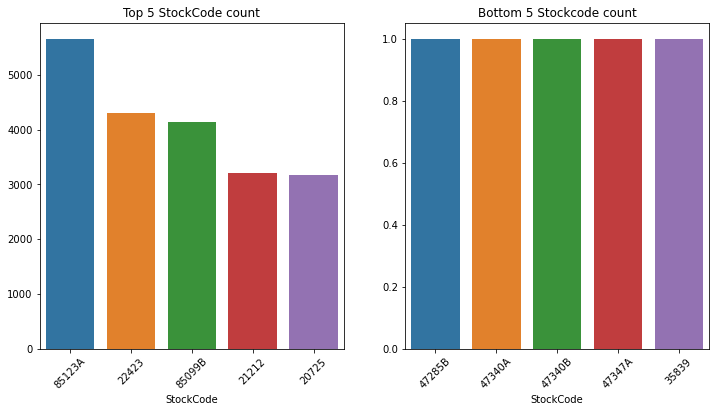

In [ ]:
plt.figure()
fig ,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
val1 = data.groupby(['StockCode'])['StockCode'].count().sort_values(ascending=False).head(5)
ax1 = sns.barplot(x=val1.index,y=val1.values,ax=ax1)
ax1.set_title("Top 5 StockCode count")
ax1.set_xticklabels(labels=val1.index, rotation=45)


val2 = data.groupby(['StockCode'])['StockCode'].count().sort_values(ascending=False).tail(5)
sns.barplot(x=val2.index,y=val2.values,ax=ax2)
ax2.set_title("Bottom 5 Stockcode count")
ax2.set_xticklabels(labels=val2.index, rotation=45)
plt.show()

Observation:
1. Top 5 StockCode have minimum occurence of 300 times in the dataset.(Stockcode maybe be the important/demanded product)
2. The least demanded product maybe from the bottom 5 StockCode products(Depends on the quantity of product purchased).
    

# Analyzing the "Quantity" feature in the dataset

In [ ]:
temp = data[data['Quantity']>=0]['Quantity'].value_counts().head(50)
print(temp.head(10))

1     278159
2     155077
12    119273
6      83115
3      70744
4      70716
24     46155
10     40411
8      25202
5      22495
Name: Quantity, dtype: int64


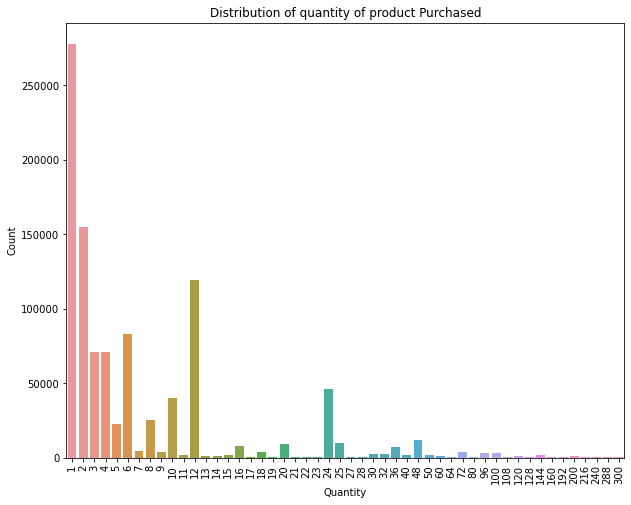

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=temp.index,y=temp.values)
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.title("Distribution of quantity of product Purchased")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

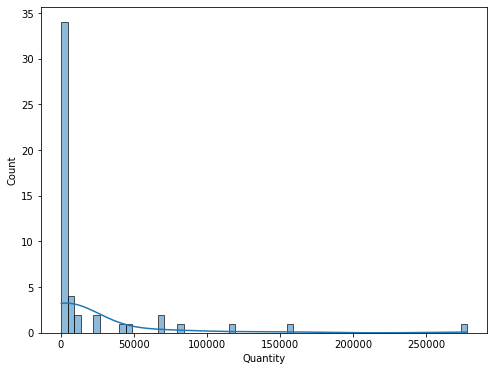

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(temp,kde=True)

Observation : 
1. Among the purchased product the most of them are bought in unit quantity
2. The quantity of product purchased descreases as the number of quantity of the product is increased as it is evident from the trending pattern.

In [ ]:
temp = data[data['Quantity']<0]['Quantity'].value_counts().head(50)
print(temp.head(10))

-1     8726
-2     2922
-3     1388
-12    1181
-4     1110
-6     1068
-24     505
-5      468
-8      384
-10     350
Name: Quantity, dtype: int64


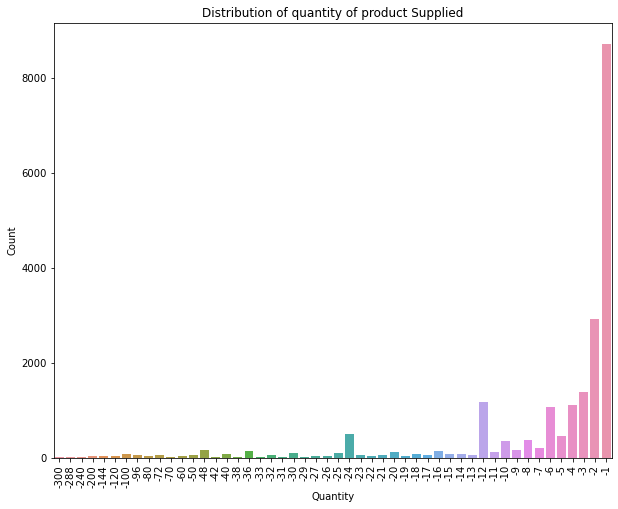

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=temp.index,y=temp.values)
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.title("Distribution of quantity of product Supplied")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

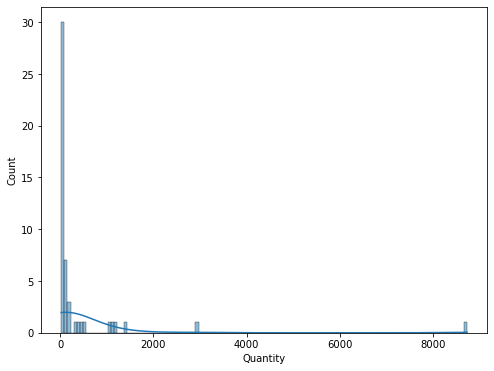

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(temp,kde=True)

Observation : 
1. Among the Supplied product the most of them are bought in unit quantity
2. The quantity of product supplied descreases as the number of quantity of the product is increased as it is evident from the trending pattern.

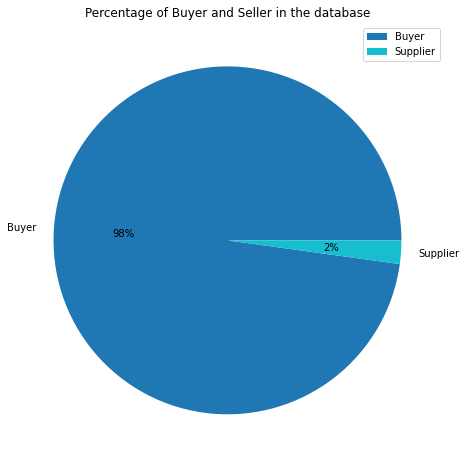

In [ ]:
purchaser = data[data['Quantity']>0].shape[0]
supplier = data[data['Quantity']<0].shape[0]
x = [purchaser, supplier]
labels = ['Buyer','Supplier']
colors = ['tab:blue', 'tab:cyan']

fig, ax = plt.subplots(figsize=(10,8))
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('Percentage of Buyer and Seller in the database')
ax.legend()
plt.show()

Observation:
From the Pie chart it clearly visible that only 2% of the customer are supplier, rest are buyer.

In [ ]:
# Printing the top 10 customer id who brought the maximum quantity of product fromm the store.
print("Top 10 CustomerId and the quantity of product purchased/sold")
print('-'*50)
print(data.groupby(['Customer ID'])['Quantity'].sum().sort_values(ascending=False).head(10))

Top 10 CustomerId and the quantity of product purchased/sold
--------------------------------------------------
Customer ID
14646.0    365220
13902.0    218090
13694.0    184534
18102.0    180415
14156.0    162245
14911.0    141750
17511.0    115449
16684.0    101095
14298.0     99854
12415.0     91315
Name: Quantity, dtype: int64


## Top 10 customer id and total quantity(no of products) bought from the store.

Top 10 CustomerId and the Quantity spent by them.
--------------------------------------------------
Customer ID
14646.0    365220
13902.0    218090
13694.0    184534
18102.0    180415
14156.0    162245
            ...  
17755.0       -30
15767.0       -50
15935.0      -171
14337.0      -393
13091.0     -1085
Name: Quantity, Length: 5942, dtype: int64


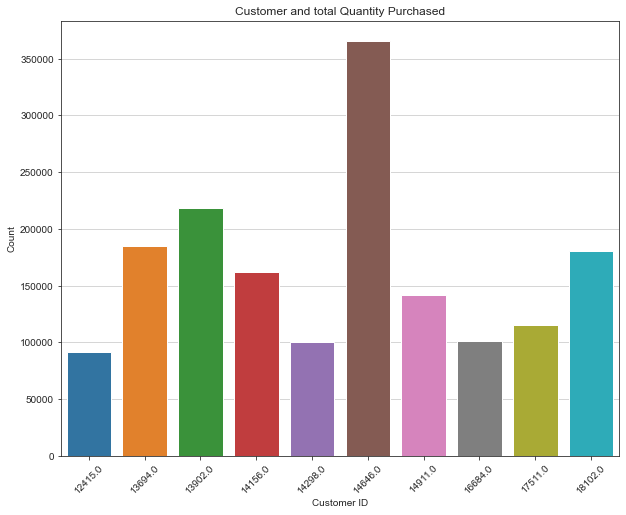

In [ ]:
# Printing the top 10 customer id who bought the maximum quantity of product fromm the store.
print("Top 10 CustomerId and the Quantity spent by them.")
print('-'*50)
print(data.groupby(['Customer ID'])['Quantity'].sum().sort_values(ascending=False))
tot_quantity = data.groupby(['Customer ID'])['Quantity'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,8))
sns.set_style("ticks",{'axes.grid' : True})
sns.barplot(x=tot_quantity.index,y=tot_quantity.values)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Customer and total Quantity Purchased")
plt.show()

Top 10 customer and the quantity of products they bought.

# Analyzing the "Price" feature in the dataset

<AxesSubplot:xlabel='Price', ylabel='Density'>

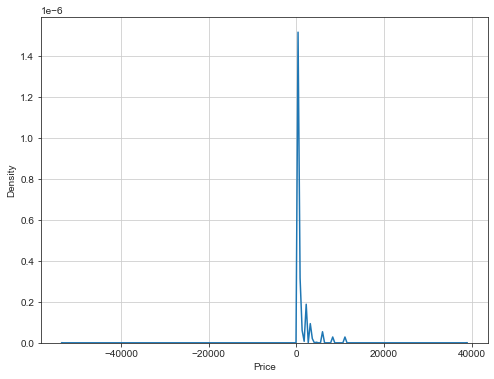

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(x='Price',data=data)

### Boxplot for Price Feature

<AxesSubplot:ylabel='Price'>

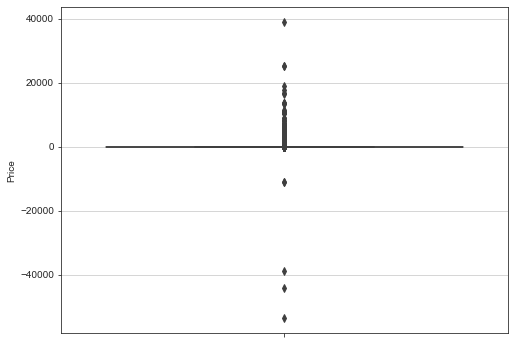

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y=data['Price'])

### ViolinPlot for Price Feature

<AxesSubplot:ylabel='Price'>

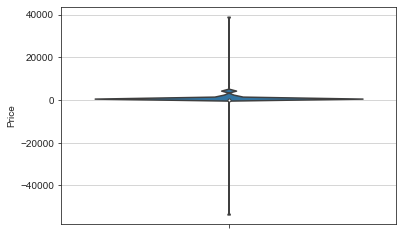

In [ ]:
sns.violinplot(y=data['Price'])

Observation:
1. As the 25th 50th and 75th percentile value coincodes hence we can confirm that most of the price are from 0-1000 unit of price from the above boxplot
2. The -ve price means that money is due.

In [ ]:
buyer_data = data[data['Price'] >= 0]
supplier_data = data[data['Price']<0]
print(buyer_data['Price'].head())
print(supplier_data['Price'].head())

0    6.95
1    6.75
2    6.75
3    2.10
4    1.25
Name: Price, dtype: float64
179403   -53594.36
276274   -44031.79
403472   -38925.87
825444   -11062.06
825445   -11062.06
Name: Price, dtype: float64


In [ ]:
print("The max price is {}".format(max(buyer_data['Price'])))
print("The min price is {}".format(min(buyer_data['Price'])))
for i in range(0,101,5):
    print("The {}th percentile value of Price is {}".format(i,np.percentile(buyer_data["Price"],i)))
    

The max price is 38970.0
The min price is 0.0
The 0th percentile value of Price is 0.0
The 5th percentile value of Price is 0.42
The 10th percentile value of Price is 0.65
The 15th percentile value of Price is 0.85
The 20th percentile value of Price is 0.95
The 25th percentile value of Price is 1.25
The 30th percentile value of Price is 1.25
The 35th percentile value of Price is 1.65
The 40th percentile value of Price is 1.65
The 45th percentile value of Price is 1.95
The 50th percentile value of Price is 2.1
The 55th percentile value of Price is 2.51
The 60th percentile value of Price is 2.95
The 65th percentile value of Price is 2.95
The 70th percentile value of Price is 3.75
The 75th percentile value of Price is 4.15
The 80th percentile value of Price is 4.95
The 85th percentile value of Price is 5.95
The 90th percentile value of Price is 7.95
The 95th percentile value of Price is 9.95
The 100th percentile value of Price is 38970.0


In [ ]:
for i in range(95,101,1):
    print("The {}th percentile value of Price is {}".format(i,np.percentile(buyer_data["Price"],i)))

The 95th percentile value of Price is 9.95
The 96th percentile value of Price is 11.02
The 97th percentile value of Price is 12.75
The 98th percentile value of Price is 14.95
The 99th percentile value of Price is 18.0
The 100th percentile value of Price is 38970.0


In [ ]:
i = 99
delta = 0.1
while i <= 100:
    print("The {}th percentile value of Price is {}".format(i,np.percentile(buyer_data["Price"],i)))
    i += delta

The 99th percentile value of Price is 18.0
The 99.1th percentile value of Price is 19.96
The 99.19999999999999th percentile value of Price is 21.23
The 99.29999999999998th percentile value of Price is 24.95
The 99.39999999999998th percentile value of Price is 25.49
The 99.49999999999997th percentile value of Price is 25.49
The 99.59999999999997th percentile value of Price is 33.29
The 99.69999999999996th percentile value of Price is 40.0
The 99.79999999999995th percentile value of Price is 82.5
The 99.89999999999995th percentile value of Price is 218.07075999979165
The 99.99999999999994th percentile value of Price is 38969.99999193305


### Osbervation

As the 99th percentile value of price is 18 unit, that means 99% of the price is less equal to 18unit.
There is maximum density(density peaks) at 0-1000 unit of price that mean most of the purchase are of price between 0-1000. Lets confirm it from boxplot
People don't want to buy expensive thing.

As we can see more than 99% of people has a spent amount of about less than 20 unit of price and rest 5% people have spent >20 unit.
Among the 1% there are people who has spent amount of more than 100 unit of price and there are some who spent extremely large amount.
Hence people can be catergorised into 3 categories based on their spending habits:
1. Regular Customer
2. Special Customer
3. Elite customer

In [ ]:
print("The max price is {}".format(min(supplier_data['Price'])))
print("The min price is {}".format(max(supplier_data['Price'])))
for i in range(0,101,5):
    print("The {}th percentile value of Price is -{}".format(i,np.percentile(abs(supplier_data["Price"]),i)))


The max price is -53594.36
The min price is -11062.06
The 0th percentile value of Price is -11062.06
The 5th percentile value of Price is -11062.06
The 10th percentile value of Price is -11062.06
The 15th percentile value of Price is -11062.06
The 20th percentile value of Price is -11062.06
The 25th percentile value of Price is -11062.06
The 30th percentile value of Price is -16634.822
The 35th percentile value of Price is -22207.584
The 40th percentile value of Price is -27780.346000000005
The 45th percentile value of Price is -33353.108
The 50th percentile value of Price is -38925.87
The 55th percentile value of Price is -39947.054000000004
The 60th percentile value of Price is -40968.238000000005
The 65th percentile value of Price is -41989.422
The 70th percentile value of Price is -43010.606
The 75th percentile value of Price is -44031.79
The 80th percentile value of Price is -45944.304000000004
The 85th percentile value of Price is -47856.818
The 90th percentile value of Price is 

In [ ]:
for i in range(95,101,1):
    print("The {}th percentile value of Price is -{}".format(i,np.percentile(abs(supplier_data["Price"]),i)))

The 95th percentile value of Price is -51681.846
The 96th percentile value of Price is -52064.3488
The 97th percentile value of Price is -52446.8516
The 98th percentile value of Price is -52829.3544
The 99th percentile value of Price is -53211.8572
The 100th percentile value of Price is -53594.36


In [ ]:
i = 99
delta = 0.1
while i <= 100:
    print("The {}th percentile value of Price is -{}".format(i,np.percentile(abs(supplier_data["Price"]),i)))
    i += delta

The 99th percentile value of Price is -53211.8572
The 99.1th percentile value of Price is -53250.10748
The 99.19999999999999th percentile value of Price is -53288.35776
The 99.29999999999998th percentile value of Price is -53326.60804
The 99.39999999999998th percentile value of Price is -53364.85831999999
The 99.49999999999997th percentile value of Price is -53403.108599999985
The 99.59999999999997th percentile value of Price is -53441.358879999985
The 99.69999999999996th percentile value of Price is -53479.609159999985
The 99.79999999999995th percentile value of Price is -53517.859439999986
The 99.89999999999995th percentile value of Price is -53556.10971999998
The 99.99999999999994th percentile value of Price is -53594.35999999998


Observation:
1. About 45% of supplier supplies product worth of 33353.108 unit of price.
2. About 50% of supplier supplies product worth of amount > 33400 and < 500000 unit of price
3. Only 5% of supplier supplies product worth of amount >= 50000

* Hence we can catergorize the supplier into 3 categories:
1. Regular 
2. Special
3. Elite

In [ ]:
def categorize_buyer(x):
    if x <= 20:
        return "Regular"
    elif x > 20 and x < 220:
        return "Special"
    else:
        return "Elite"

In [ ]:
def categorize_supplier(x):
    if abs(x) <= 33360:
        return "Regular"
    elif abs(x) > 33400 and abs(x) < 50000:
        return "Special"
    else:
        return "Elite"

In [ ]:
data['Category'] = data['Price'].apply(lambda x: categorize_buyer(x) if x >= 0 else categorize_supplier(x))
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Category
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,Regular
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Regular
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Regular
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,Regular
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,Regular


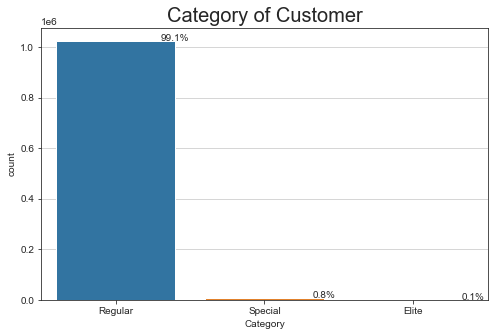

In [ ]:
#Plotting the distribution of different category of customer.

plt.figure(figsize=(8,5))
total = float(len(data))
ax = sns.countplot(x="Category", data=data)
plt.title('Category of Customer', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Observation:
1. From the plot it is evident that there are 99.1% people are Regular Customer/Supplier.
2. From the plot it is evident that there are 0.8% people are Special Customer/Supplier.
3. From the plot it is evident that there are 0.1% people are Elite Customer/Supplier.

In [ ]:
data[data['Price']>218.0].groupby(['Customer ID'])['Price'].count().sort_values(ascending=False)

Customer ID
14911.0    32
14096.0    24
14156.0    13
12744.0    12
12748.0    11
           ..
13231.0     1
13235.0     1
15482.0     1
13335.0     1
16151.0     1
Name: Price, Length: 157, dtype: int64

## Top 10 most loyal customer with their ID.

In [ ]:
# Printing the top 10 customer id who brought the maximum quantity of product fromm the store.
print("Top 10 CustomerId and the Price spent by them.")
print('-'*50)
print(data.groupby(['Customer ID'])['Price'].sum().sort_values(ascending=False).head(10))

Top 10 CustomerId and the Price spent by them.
--------------------------------------------------
Customer ID
14911.0    70473.10
14096.0    41376.33
15098.0    40278.90
14063.0    39920.95
14156.0    36397.01
17841.0    34582.23
15760.0    33628.55
12918.0    32860.50
12744.0    25481.40
17399.0    25111.09
Name: Price, dtype: float64


## Price spent by the top 10 customer to purchase items from the store.

Top 10 CustomerId and the Price spent by them.
--------------------------------------------------
Customer ID
14911.0    70473.10
14096.0    41376.33
15098.0    40278.90
14063.0    39920.95
14156.0    36397.01
17841.0    34582.23
15760.0    33628.55
12918.0    32860.50
12744.0    25481.40
17399.0    25111.09
Name: Price, dtype: float64


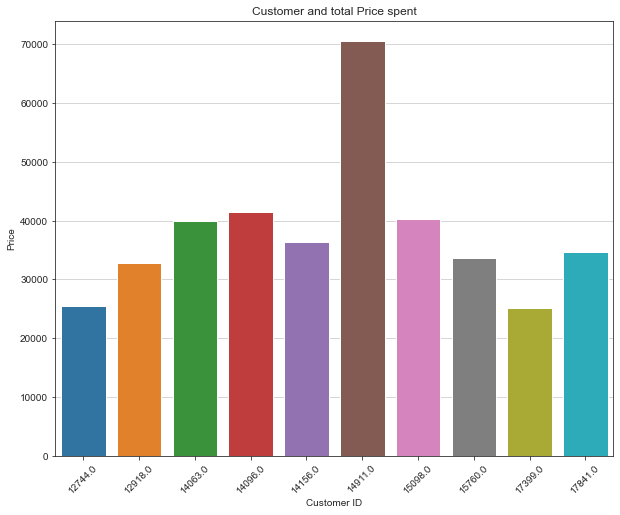

In [ ]:
# Printing the top 10 customer id who spent maximum price on the product from the store.
print("Top 10 CustomerId and the Price spent by them.")
print('-'*50)
print(data.groupby(['Customer ID'])['Price'].sum().sort_values(ascending=False).head(10))
custid_tot_price = data.groupby(['Customer ID'])['Price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,8))
sns.set_style("ticks",{'axes.grid' : True})
sns.barplot(x=custid_tot_price.index,y=custid_tot_price.values)
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.title("Customer and total Price spent")
plt.show()

Observation:
1. The customer id and their corresponding spent amount on the store/website.

### Number of customer who bought frequently and are among the top 500 max spent customers

In [ ]:
custid_tot_price = list(data.groupby(['Customer ID'])['Price'].sum().sort_values(ascending=False).head(500).index)
x = len(set(customer_id_frequent_purchase).intersection(set(custid_tot_price)))
print("The number of customer who bought most frequently and are among the top 500 max spent customer are: {}".format(x))


The number of customer who bought most frequently and are among the top 500 max spent customer are: 383


Observation:
There are as many 383 members who are top buyer and frequently buy from the store which means they seems to be happy with the product and customer service therfore they often return back to make a purchase from the store

## Country of the customer who spent maximum amount to purchase the product from the store.

In [ ]:
# Printing the top 10 customer id  and their country who brought the maximum quantity of product from the store.
print("Top 10 CustomerId and the Price spent by them.")
print('-'*50)
custid_max_spent = data.groupby(['Customer ID'])['Price'].sum().sort_values(ascending=False).head(10).index
df = data['Customer ID'].apply(lambda x: True if x in custid_max_spent else False)
data[df][['Customer ID','Country']].head(10)

Top 10 CustomerId and the Price spent by them.
--------------------------------------------------


,Customer ID,Country
440,14911.0,EIRE
441,14911.0,EIRE
442,14911.0,EIRE
443,14911.0,EIRE
444,14911.0,EIRE
445,14911.0,EIRE
446,14911.0,EIRE
447,14911.0,EIRE
448,14911.0,EIRE
449,14911.0,EIRE


Observation: Top 10 loyal customer, all belong from EIRE

## Countries from where most Customer are from.

In [ ]:
# Countries from where most customer are from.

loyal_cust_countries = pd.Series(data[df]['Country'].value_counts().head(10).index)
print(loyal_cust_countries)

0    United Kingdom
1              EIRE
2         Singapore
3            Norway
dtype: object


Observation:
Most of the loyal customer are from United Kingdom, EIRE, Singapore, Norway which means our service is fairly good in these countries. 

# Countries from where very less Customer are from.

In [ ]:
# Countries from where less customer are.

least_cust_countries = pd.Series(data[df]['Country'].value_counts().tail(10).index)
print(least_cust_countries)

0    United Kingdom
1              EIRE
2         Singapore
3            Norway
dtype: object


Observation:
1. Least customer base are from  Sweden, Matla which means our service in countries are not good and we need to improve our service.
2. Good offer/sales must be provided to improve our sales number.

# Analysing Customer ID feature

In [ ]:
cust_data = data[data['Customer ID'].isnull()]
cust_data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Category
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom,Regular
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom,Regular
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom,Regular
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom,Regular
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom,Regular


In [ ]:
# There are lot of null values in the customer id features.
cust_data.shape

(235151, 9)

### Was there any technical fault due to which there where so many null values in the customer id?

In [ ]:
cust_data['Dates'] = pd.to_datetime(cust_data['InvoiceDate']).dt.date
cust_data['Time'] = pd.to_datetime(cust_data['InvoiceDate']).dt.time
cust_data.drop(['InvoiceDate'],axis=1,inplace=True)

<AxesSubplot:xlabel='Dates'>

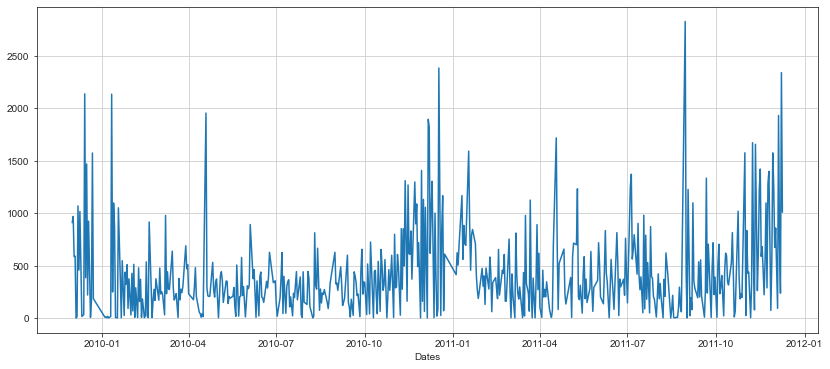

In [ ]:
plt.figure(figsize=(14,6))
cust_data.groupby(['Dates'])['Description'].count().plot(kind='line')

Observation:
1. There are null values early in the year like in Jan and mid Feb and then it agains spikes at the end of the year in Nov and Dec for year 2010

2. The above pattern is not observed in the year 2011. Hence the time series is not stationary with time.
Hence we can conclude the null values that has cripped in the DB are at random.

<AxesSubplot:xlabel='Time'>

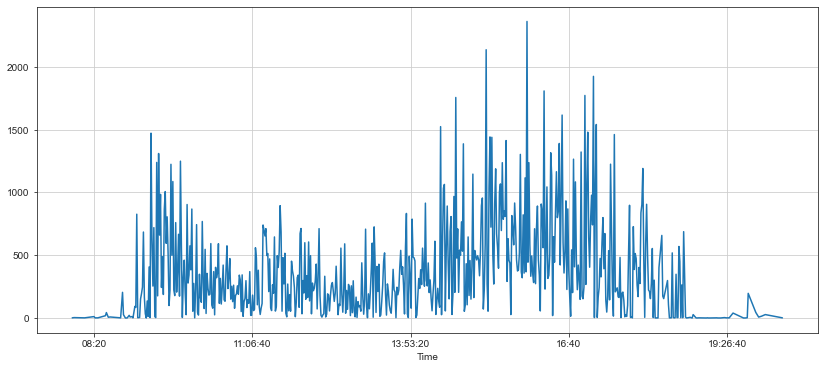

In [ ]:
plt.figure(figsize=(14,6))
cust_data.groupby(['Time'])['Description'].count().plot(kind='line')

Observation: 
No information can be derived from null value analysis cause the time series are non stationary and are purely random.

In [ ]:
data['Dates'] = pd.to_datetime(data['InvoiceDate']).dt.date
data['Time'] = pd.to_datetime(data['InvoiceDate']).dt.time
data['day'] = pd.to_datetime(data['InvoiceDate']).dt.day
# data.drop(['InvoiceDate'],axis=1,inplace=True)

In [ ]:
Transaction_data=data.sort_values(['Customer ID','Dates'])\
                                     .reset_index(drop=True)

In [ ]:
Grouped_data=Transaction_data.groupby(by='Customer ID')['Dates']\
                                 .agg(['first','last'])

In [ ]:
Grouped_data['Duration'] = (Grouped_data['last'] - Grouped_data['first']).dt.days
Grouped_data = Grouped_data.sort_values(['Duration'],ascending=False).reset_index()
Grouped_data.head()

,Customer ID,first,last,Duration
0,17428.0,2009-12-01,2011-12-09,738
1,18102.0,2009-12-01,2011-12-09,738
2,15311.0,2009-12-01,2011-12-09,738
3,13777.0,2009-12-02,2011-12-09,737
4,14621.0,2009-12-01,2011-12-08,737


In [ ]:
Grouped_data.drop(['first','last'],axis=1,inplace=True)
Grouped_dict = dict(zip(Grouped_data['Customer ID'],Grouped_data['Duration']))

In [ ]:
def func(customer_id,Grouped_data):
    return Grouped_data[Grouped_data['Customer ID']==customer_id]['Duration']

In [ ]:
data['Membership_Days'] = data['Customer ID'].map(Grouped_dict)
data[data['Customer ID'] == 17428.0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Category,Dates,Time,day,Membership_Days
3115,489656,20770,ABSTRACT CIRCLE JOURNAL,18,2009-12-01 17:28:00,2.55,17428.0,United Kingdom,Regular,2009-12-01,17:28:00,1,738.0
3116,489656,22199,FRYING PAN RED POLKADOT,8,2009-12-01 17:28:00,4.25,17428.0,United Kingdom,Regular,2009-12-01,17:28:00,1,738.0
3117,489656,22023,EMPIRE BIRTHDAY CARD,12,2009-12-01 17:28:00,0.42,17428.0,United Kingdom,Regular,2009-12-01,17:28:00,1,738.0
3118,489656,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,24,2009-12-01 17:28:00,2.75,17428.0,United Kingdom,Regular,2009-12-01,17:28:00,1,738.0
3119,489657,22349,"DOG BOWL , CHASING BALL DESIGN",4,2009-12-01 17:28:00,3.75,17428.0,United Kingdom,Regular,2009-12-01,17:28:00,1,738.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002445,577044,22584,PACK OF 6 PANETTONE GIFT BOXES,144,2011-11-17 13:45:00,2.10,17428.0,United Kingdom,Regular,2011-11-17,13:45:00,17,738.0
1002446,577045,23681,LUNCH BAG RED VINTAGE DOILY,100,2011-11-17 13:46:00,1.45,17428.0,United Kingdom,Regular,2011-11-17,13:46:00,17,738.0
1065904,581488,23118,PARISIENNE JEWELLERY DRAWER,16,2011-12-09 09:45:00,6.65,17428.0,United Kingdom,Regular,2011-12-09,09:45:00,9,738.0
1065905,581488,23111,PARISIENNE SEWING BOX,16,2011-12-09 09:45:00,10.40,17428.0,United Kingdom,Regular,2011-12-09,09:45:00,9,738.0


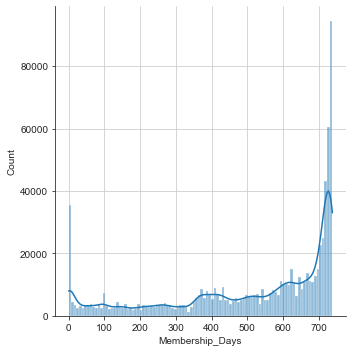

In [ ]:
sns.displot(data['Membership_Days'],kde=True)

In [ ]:
temp = data.groupby(['Customer ID'])['Quantity'].agg('sum').reset_index()
temp = dict(zip(temp['Customer ID'],temp['Quantity']))

In [ ]:
data['Total_quantity_purchased'] = data['Customer ID'].map(temp)
data['Total_price'] = data['Quantity']*data['Price']
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Category,Dates,Time,day,Membership_Days,Total_quantity_purchased,Total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,Regular,2009-12-01,07:45:00,1,581.0,835.0,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Regular,2009-12-01,07:45:00,1,581.0,835.0,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Regular,2009-12-01,07:45:00,1,581.0,835.0,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,Regular,2009-12-01,07:45:00,1,581.0,835.0,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,Regular,2009-12-01,07:45:00,1,581.0,835.0,30.0


<AxesSubplot:xlabel='Membership_Days', ylabel='Total_quantity_purchased'>

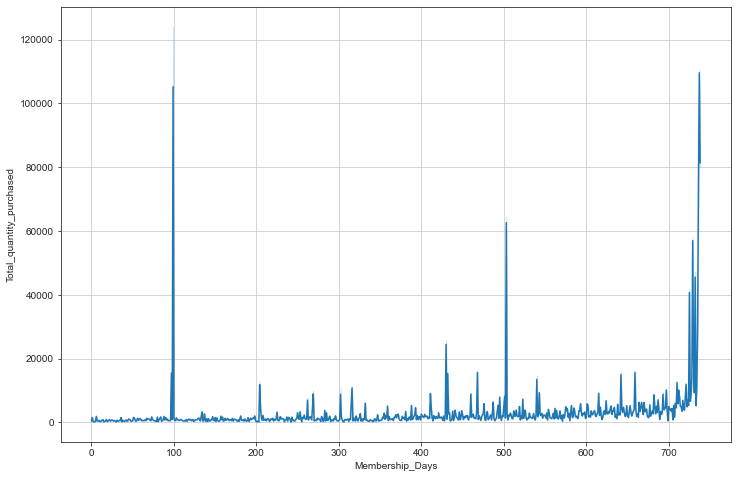

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Membership_Days',y='Total_quantity_purchased',data=data)

Observation:
1. As the number of membership days increases the number of product trend also increases.
2. People who are members since long time tend to purchase more number of product.

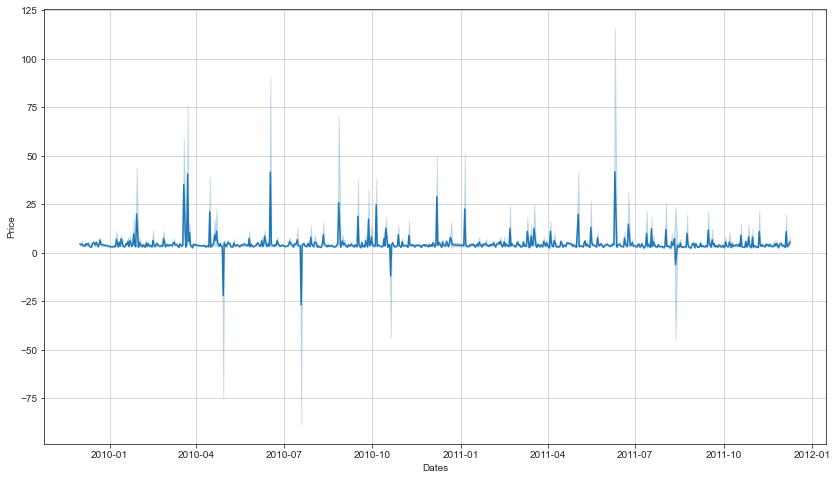

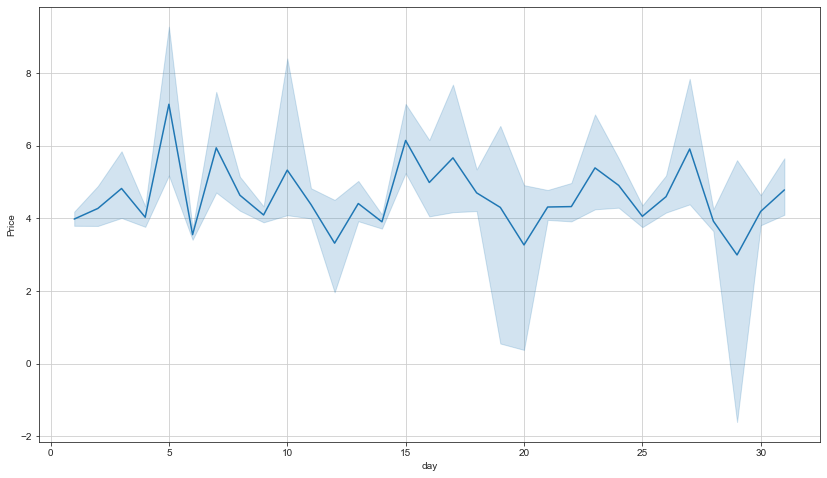

In [ ]:
plt.figure(figsize=(14,8))
sns.lineplot(x='Dates',y='Price',data=data)
plt.show()
plt.figure(figsize=(14,8))
sns.lineplot(x='day',y='Price',data=data)
plt.show()

Observation:
1. People tend to spend money in the month of March and June maybe cause of festive season or maybe people got their bonus.
2. People tend to spend money in the beginning of the month and gradually spending decreases as  month end approaches.

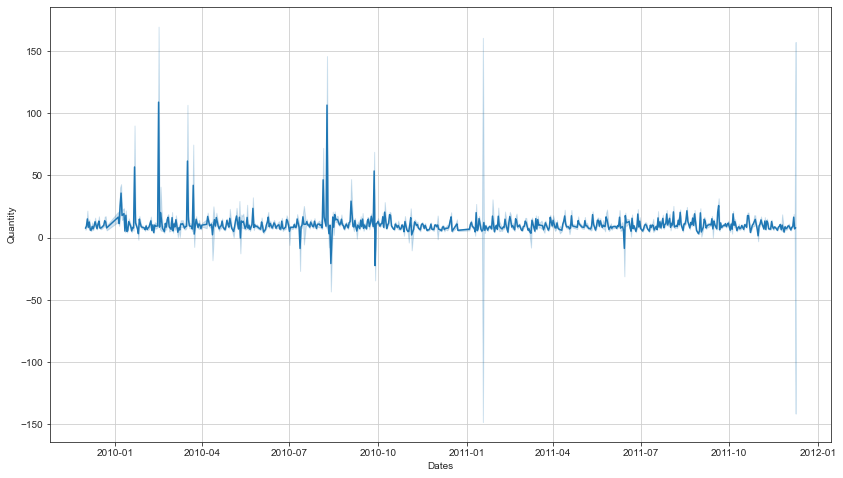

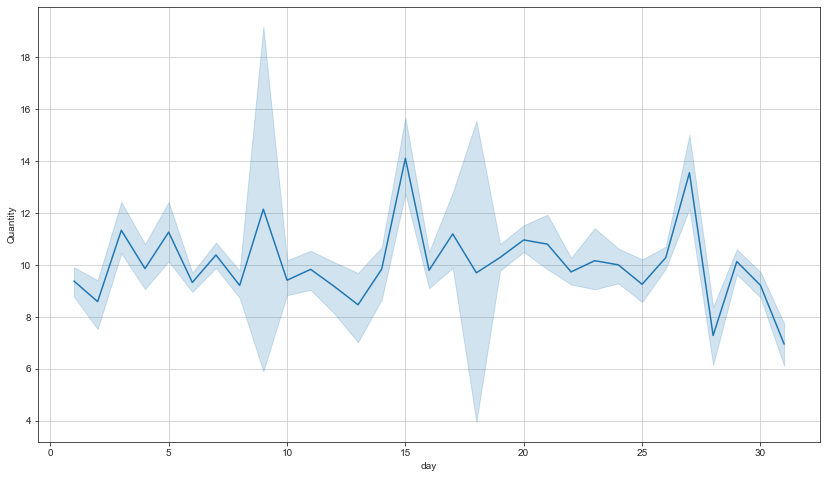

In [ ]:
plt.figure(figsize=(14,8))
sns.lineplot(x='Dates',y='Quantity',data=data)
plt.show()
plt.figure(figsize=(14,8))
sns.lineplot(x='day',y='Quantity',data=data)
plt.show()

Observation:
1. In year 2010 People used to order more quantity of product but the quantity of product ordered has reduced year after year. Maybe People found other alternative.
2. No trend on quantity of product purchased during xth day of the month.

# Analyzing the 'Description' Feature.

In [ ]:
description_text = data['Description'].values

# Preprocessing of Text 

Preprocessing:

    Removing html tags
    Removing Punctuations
    Performing stemming
    Removing Stopwords
    Expanding contractions etc.


In [ ]:
import nltk

SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    


In [ ]:
text_corpus = []
for text in description_text:
    text_corpus.append(preprocess(text))


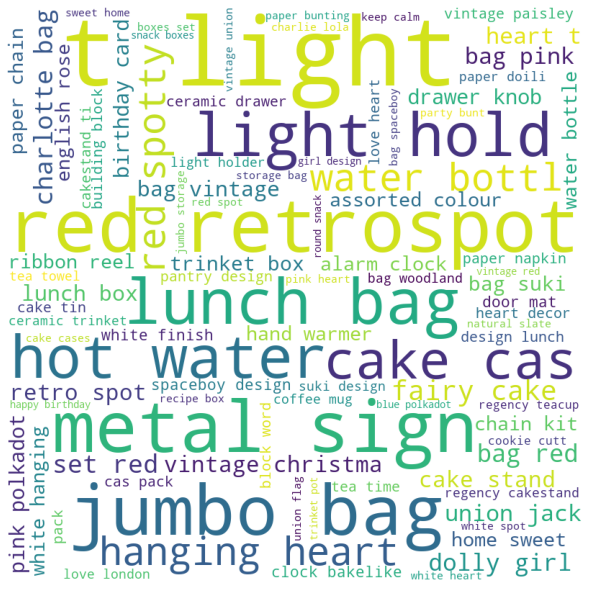

In [ ]:

comment_words = ''
stopwords = set(STOPWORDS)
for val in text_corpus:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Observation:
1. We can see from the wordcloud what are the most used words in the description of the product.
2. Hanging heat, Jumbo bag, Cake, Hot water, water bottle are some of the product that are frequently talked about. Maybe they are the more oftern bought product on the store/website.

# Conslusion

1. As we have found that our services are good in some of the countries, we need to keep up the good work their.
2. We need to improve our customer service in the countries where we don't have strong hold on the market by giving them discount, sales, special benefits such as monthly subscription and other benefits.
3. From the time series data we can stock up our goods to overcome the issue of stock shortage in case of surge in the demand of the products.
4. We have categorize the customer into different categories and hence different benefits/discounts can be rolled out and marketing can be done on that basis.